# detecting the outliers 

In [1]:
import pandas as pd

data = pd.read_csv("house.csv")

data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [20]:
data.dropna(inplace=True)

In [21]:
# importing modules
from numpy import mean
from numpy import std

# calculating mean and std
data_mean = mean(data.price)
data_std =  std(data.price)


# identify outliers after  3 std
cut_off = data_std * 3


lower = data_mean - cut_off
upper =data_mean + cut_off

In [4]:
# identify outliers in the price
outliers = [x for x in data.price if x < lower or x > upper]

# printing outliers
print("total outliers are :", len(outliers))

total outliers are : 47


In [5]:
import matplotlib.pyplot as plt

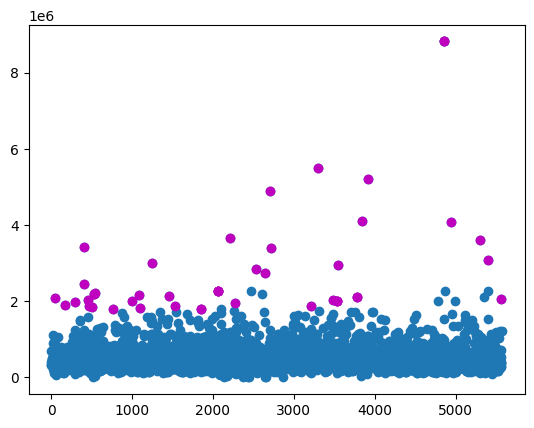

In [6]:
# plotting whole dataset
plt.scatter(data.price.index, data.price)

# using for loop to detect the outliers
for i in data.price:
    if i in outliers:
        
#         Visualize outliers using Python
        plt.scatter(data.price[data.price == i].index[0], i, c='m')

In [7]:
#Using drop() to delete rows based on column value
data.drop(data.price[data.price < lower].index, inplace = True)
data.drop(data.price[data.price > upper].index, inplace = True)

In [8]:
data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000
5,3,4,53.0,38.530686,68.745261,513000


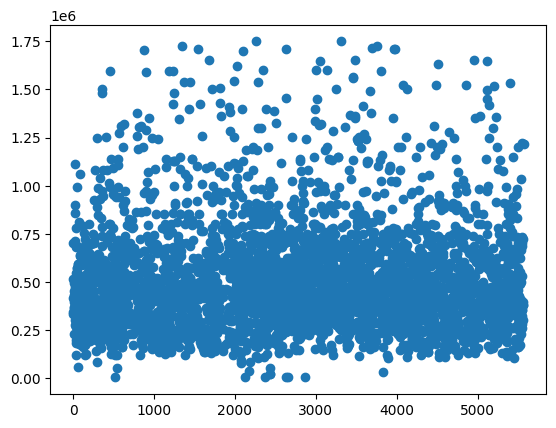

In [9]:
plt.scatter(data.price.index, data.price)


## Boosting algorithms
Boosting is a machine learning algorithm that is used to improve the accuracy of other algorithms. The general idea behind boosting is to combine a set of weak learners (i.e., algorithms that perform slightly better than random guessing) into a strong learner that is able to make accurate predictions.

The boosting algorithm works by sequentially training a series of weak learners on the same dataset, and then combining their predictions to form a single, more accurate prediction. At each step, the algorithm gives more weight to the examples that were incorrectly predicted by the previous weak learner, so that the next weak learner is more likely to focus on these examples and make better predictions.

The most common type of boosting algorithm is AdaBoost (Adaptive Boosting), which was introduced by Freund and Schapire in 1996. AdaBoost is particularly effective for classification problems, and has been successfully applied to a wide range of domains, including computer vision, natural language processing, and bioinformatics.

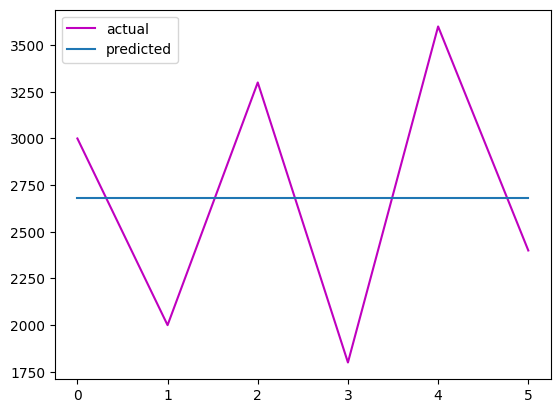

In [10]:
# acutal values
actual = [3000, 2000, 3300, 1800, 3600, 2400]
first_iteration =[2683,2683,2683,2683,2683,2683 ]

# importing the required modules
import matplotlib.pyplot as plt

# actual values
plt.plot([i for i in range(len(actual))], actual, label='actual' , c='m')

# predicted values
plt.plot([i for i in range(len(actual))], first_iteration, label='predicted')

plt.legend()
plt.show()

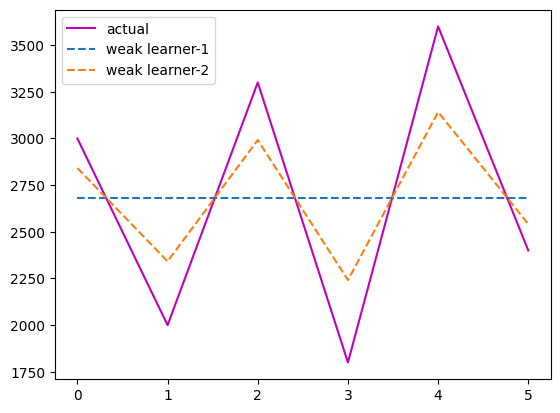

In [11]:
errors = []
for i in actual:
    errors.append(i-2683)
second_i = []
for i in errors:
    second_i.append(2683 + (0.5*i))

# actual values
plt.plot([i for i in range(len(actual))], actual, label='actual' , c='m')

# predicted values
plt.plot([i for i in range(len(actual))], first_iteration, label='weak learner-1', linestyle='dashed')

# predicted values of weak learner 2
plt.plot([i for i in range(len(actual))], second_i, label='weak learner-2', linestyle='dashed')


plt.legend()
plt.show()

In [12]:
# importing dataset 
data = pd.read_csv('house.csv')

# heading of the dataset
data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [13]:
data.dropna(inplace=True)

In [14]:
# input and output variables
Input = data.drop('price', axis=1)
Output = data.price

In [15]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.25)

In [16]:
import lightgbm as lgb
# initialzing the model
model_reg = lgb.LGBMRegressor()

# train the model
model_reg.fit(X_train,y_train)

LGBMRegressor()

In [17]:
# Making predictions
reg_pred = model_reg.predict(X_test)

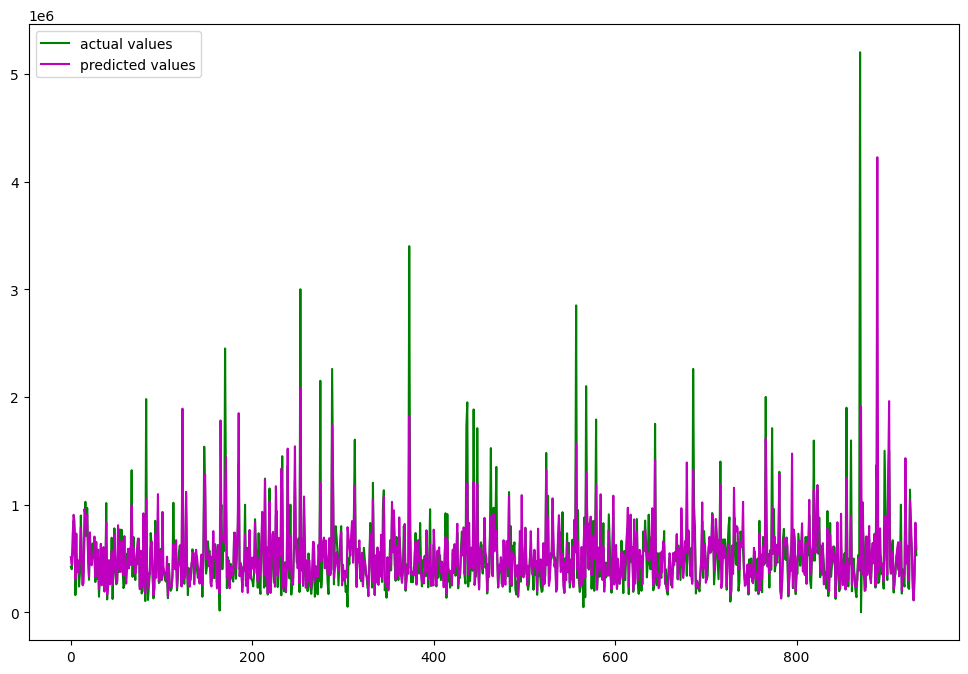

In [18]:
# importing the module
import matplotlib.pyplot as plt

# figure size
plt.figure(figsize=(12, 8))

# acutal values
plt.plot([i for i in range(len(y_test))],y_test, c='g', label="actual values")

# predicted values
plt.plot([i for i in range(len(y_test))],reg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [19]:
#importing the r-square score
from sklearn.metrics import r2_score

# calculating the r score 
print('R score is :', r2_score(y_test, reg_pred))

R score is : 0.4576760924717791
